In [1]:
import math
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt

# Defining the function that predicts the speaker :

In [2]:
def predict_speaker(mfcc_features, gmm_models):
    highest_score = -float('inf')
    predicted_speaker = None

    # Calculate scores for each GMM model
    for model_name, gmm_model in gmm_models.items():
        score = gmm_model.score(mfcc_features)

        if score > highest_score:
            highest_score = score
            predicted_speaker = model_name.split(".")[0]

    return highest_score, predicted_speaker


# Loading all the gmm models and storing them in dictionaries according to the  n_components and gender : 
## key: model_name , value: gmm model 

In [3]:
# Load all GMM models from the appropriate folder
model_folder = r'C:\Users\ASUS ROG STRIX\Desktop\Projet\RAL\GMM\H'
gmm_models_H_128 = {}
gmm_models_H_256 = {}
gmm_models_H_512 = {}
gmm_models_H_1024 = {}
for model_filename in os.listdir(model_folder):
    model_path = os.path.join(model_folder, model_filename)
    gmm_model = joblib.load(model_path)
    if model_filename.endswith(".128.gmm"):
        gmm_models_H_128[model_filename] = gmm_model
    elif model_filename.endswith(".256.gmm"):
        gmm_models_H_256[model_filename] = gmm_model
    elif model_filename.endswith(".512.gmm"):
        gmm_models_H_512[model_filename] = gmm_model
    elif model_filename.endswith(".1024.gmm"):
        gmm_models_H_1024[model_filename] = gmm_model



In [4]:
# Load all GMM models from the appropriate folder
model_folder = r'C:\Users\ASUS ROG STRIX\Desktop\Projet\RAL\GMM\F'
gmm_models_F_128 = {}
gmm_models_F_256 = {}
gmm_models_F_512 = {}
gmm_models_F_1024 = {}
for model_filename in os.listdir(model_folder):
    model_path = os.path.join(model_folder, model_filename)
    gmm_model = joblib.load(model_path)
    if model_filename.endswith(".128.gmm"):
        gmm_models_F_128[model_filename] = gmm_model
    elif model_filename.endswith(".256.gmm"):
        gmm_models_F_256[model_filename] = gmm_model
    elif model_filename.endswith(".512.gmm"):
        gmm_models_F_512[model_filename] = gmm_model
    elif model_filename.endswith(".1024.gmm"):
        gmm_models_F_1024[model_filename] = gmm_model

In [5]:
gmm_models_F_128

{'F1.128.gmm': GaussianMixture(n_components=128),
 'F10.128.gmm': GaussianMixture(n_components=128),
 'F2.128.gmm': GaussianMixture(n_components=128),
 'F3.128.gmm': GaussianMixture(n_components=128),
 'F4.128.gmm': GaussianMixture(n_components=128),
 'F5.128.gmm': GaussianMixture(n_components=128),
 'F6.128.gmm': GaussianMixture(n_components=128),
 'F7.128.gmm': GaussianMixture(n_components=128),
 'F8.128.gmm': GaussianMixture(n_components=128),
 'F9.128.gmm': GaussianMixture(n_components=128)}

# Loading the files containing the mfcc features and storing them in dictionaries according to duration and gender:
## key: file_name , value: mfcc_features

In [6]:
# Set the path to the test folder
test_folder = r'C:\Users\ASUS ROG STRIX\Desktop\Projet\RAL\MFCC\Test-segments'

# Initialize dictionaries to store the loaded test files
test_files_3_H = {}
test_files_3_F = {}
test_files_10_H = {}
test_files_10_F = {}
test_files_15_H = {}
test_files_15_F = {}
test_files_30_H = {}
test_files_30_F = {}

# Set the duration sub-folders
duration_folders = ["3", "10", "15", "30"]

for duration_folder in duration_folders:
    duration_folder_path = os.path.join(test_folder, duration_folder)

    # Check if the duration sub-folder exists
    if os.path.isdir(duration_folder_path):
        # Iterate over the gender sub-folders
        for gender_folder in os.listdir(duration_folder_path):
            gender_folder_path = os.path.join(duration_folder_path, gender_folder)

            # Check if the item in the duration sub-folder is a directory
            if os.path.isdir(gender_folder_path):
                # Determine the appropriate dictionary based on duration and gender
                if duration_folder == "3" and gender_folder == "H":
                    test_files_dict = test_files_3_H
                elif duration_folder == "3" and gender_folder == "F":
                    test_files_dict = test_files_3_F
                elif duration_folder == "10" and gender_folder == "H":
                    test_files_dict = test_files_10_H
                elif duration_folder == "10" and gender_folder == "F":
                    test_files_dict = test_files_10_F
                elif duration_folder == "15" and gender_folder == "H":
                    test_files_dict = test_files_15_H
                elif duration_folder == "15" and gender_folder == "F":
                    test_files_dict = test_files_15_F
                elif duration_folder == "30" and gender_folder == "H":
                    test_files_dict = test_files_30_H
                elif duration_folder == "30" and gender_folder == "F":
                    test_files_dict = test_files_30_F

                # Iterate over the test segments within the gender sub-folder
                for filename in os.listdir(gender_folder_path):
                    if filename.endswith(".mfcc"):
                        test_segment_path = os.path.join(gender_folder_path, filename)

                        # Load the MFCC features
                        mfcc_features = np.genfromtxt(test_segment_path, delimiter=',')

                        # Add the loaded features to the corresponding dictionary with the filename as the key
                        test_files_dict[filename] = mfcc_features


# Getting the predictions for the test segments:

# 1. Male tests :
## a. GMM 128 :
### 3 second segments :


In [7]:
results_3_H_128 = []

for test_segment_name, test_segment in test_files_3_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_128)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary
    results_3_H_128.append(mydict)

for result in results_3_H_128:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()



Test Speaker: H1
Num Segments: 1
MAX_Score: -55.526226112216584 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 10
MAX_Score: -53.5739810308537 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 11
MAX_Score: -55.69454835129535 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 12
MAX_Score: -56.95923004469761 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 13
MAX_Score: -62.77456782850709 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 14
MAX_Score: -53.56660749595834 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 15
MAX_Score: -54.37768099598945 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 16
MAX_Score: -52.64664908367124 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 17
MAX_Score: -59.19114595960055 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 18
MAX_Score: -56.42479412755161 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 2
MAX_Score: -58.163076500315135 --- Predicted Speaker: H1



In [8]:
false_prediction_rate = {}
false_predictions = 0
total_predictions = len(results_3_H_128)

for result in results_3_H_128:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_3_H_128 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_3_H_128"] = false_prediction_rate_3_H_128
false_prediction_rate_3_H_128

0.0

### 10 seconds segments :

In [9]:
results_10_H_128 = []

for test_segment_name, test_segment in test_files_10_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_128)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary
    results_10_H_128.append(mydict)

for result in results_10_H_128:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()



Test Speaker: H1
Num Segments: 1
MAX_Score: -56.48663751140208 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 2
MAX_Score: -56.02306196049102 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 3
MAX_Score: -55.12729105661597 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 4
MAX_Score: -57.97030282068416 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 5
MAX_Score: -53.86961488073598 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 6
MAX_Score: -62.024440830870695 --- Predicted Speaker: H1

Test Speaker: H2
Num Segments: 1
MAX_Score: -56.52807998486355 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -50.068527501787266 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 3
MAX_Score: -53.77006987450686 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 4
MAX_Score: -51.8661314569715 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 5
MAX_Score: -51.84205476103134 --- Predicted Speaker: H2

Test Spea

In [10]:
false_predictions = 0
total_predictions = len(results_10_H_128)

for result in results_10_H_128:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_10_H_128 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_10_H_128"] = false_prediction_rate_10_H_128
false_prediction_rate_10_H_128


0.0

### 15 seconds segments :

In [11]:
results_15_H_128 = []

for test_segment_name, test_segment in test_files_15_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_128)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary
    results_15_H_128.append(mydict)

for result in results_15_H_128:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()



Test Speaker: H1
Num Segments: 1
MAX_Score: -56.475372771446594 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 2
MAX_Score: -55.28262091422611 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 3
MAX_Score: -56.67452694328957 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 4
MAX_Score: -55.98678840814407 --- Predicted Speaker: H1

Test Speaker: H2
Num Segments: 1
MAX_Score: -53.77201569834569 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -53.13910254242608 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 3
MAX_Score: -51.931509526986005 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 4
MAX_Score: -53.588187602822345 --- Predicted Speaker: H2

Test Speaker: H4
Num Segments: 1
MAX_Score: -39.11214391225607 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 2
MAX_Score: -41.52712021257497 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 3
MAX_Score: -39.32768087889554 --- Predicted Speaker: H4

Test Sp

In [12]:
false_predictions = 0
total_predictions = len(results_15_H_128)

for result in results_15_H_128:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_15_H_128 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_15_H_128"] = false_prediction_rate_15_H_128
false_prediction_rate_15_H_128

0.0

### 30 seconds segments :

In [13]:
results_30_H_128 = []

for test_segment_name, test_segment in test_files_30_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_128)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary
    results_30_H_128.append(mydict)

for result in results_30_H_128:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -55.87899684283636 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 2
MAX_Score: -56.45719780290843 --- Predicted Speaker: H1

Test Speaker: H2
Num Segments: 1
MAX_Score: -53.455559120385885 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -52.758465695057915 --- Predicted Speaker: H2

Test Speaker: H4
Num Segments: 1
MAX_Score: -40.31963206241552 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 2
MAX_Score: -40.28329412640085 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 3
MAX_Score: -40.52566408520731 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 4
MAX_Score: -40.69499254762799 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 5
MAX_Score: -39.0492814025579 --- Predicted Speaker: H4

Test Speaker: H5
Num Segments: 1
MAX_Score: -34.05703092845958 --- Predicted Speaker: H5

Test Speaker: H5
Num Segments: 2
MAX_Score: -34.48816310949649 --- Predicted Speaker: H5

Test Spea

In [14]:
false_predictions = 0
total_predictions = len(results_30_H_128)

for result in results_30_H_128:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_30_H_128 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_30_H_128"] = false_prediction_rate_30_H_128
false_prediction_rate_30_H_128

0.0

## b. GMM 256:
### 3 seconds segments :

In [15]:
results_3_H_256 = []
for test_segment_name, test_segment in test_files_3_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_256)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_3_H_256.append(mydict)

for result in results_3_H_256:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -62.20238465509331 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 10
MAX_Score: -59.43610022240866 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 11
MAX_Score: -63.28465537189639 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 12
MAX_Score: -64.43970843739294 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 13
MAX_Score: -74.49814436561623 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 14
MAX_Score: -60.206344545891604 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 15
MAX_Score: -61.768788492479445 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 16
MAX_Score: -62.35213909323395 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 17
MAX_Score: -70.43011762582755 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 18
MAX_Score: -68.91033551367542 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 2
MAX_Score: -64.39488650774798 --- Predicted Speaker: H1


In [16]:
false_predictions = 0
total_predictions = len(results_3_H_256)

for result in results_3_H_256:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_3_H_256 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_3_H_256"] = false_prediction_rate_3_H_256
false_prediction_rate_3_H_256

0.00425531914893617

### 10 seconds segments :

In [17]:
results_10_H_256 = []
for test_segment_name, test_segment in test_files_10_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_256)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_10_H_256.append(mydict)

for result in results_10_H_256:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -63.52331114458659 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 2
MAX_Score: -63.06458564231549 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 3
MAX_Score: -62.24750247667267 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 4
MAX_Score: -66.48419129003997 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 5
MAX_Score: -62.335392936075976 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 6
MAX_Score: -76.0779603956336 --- Predicted Speaker: H1

Test Speaker: H2
Num Segments: 1
MAX_Score: -72.4969292335557 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -60.05405973940718 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 3
MAX_Score: -64.44144912667137 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 4
MAX_Score: -61.23557790430324 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 5
MAX_Score: -63.3523082449102 --- Predicted Speaker: H2

Test Speaker

In [18]:
false_predictions = 0
total_predictions = len(results_10_H_256)

for result in results_10_H_256:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_10_H_256 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_10_H_256"] = false_prediction_rate_10_H_256
false_prediction_rate_10_H_256

0.0

### 15 seconds segments :

In [19]:
results_15_H_256 = []
for test_segment_name, test_segment in test_files_15_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_256)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_15_H_256.append(mydict)

for result in results_15_H_256:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -63.34187849617921 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 2
MAX_Score: -62.54838767953729 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 3
MAX_Score: -64.8395282426553 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 4
MAX_Score: -66.72920377848523 --- Predicted Speaker: H1

Test Speaker: H2
Num Segments: 1
MAX_Score: -67.46533390330374 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -63.862958163119096 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 3
MAX_Score: -62.154280625295506 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 4
MAX_Score: -67.78048986782217 --- Predicted Speaker: H2

Test Speaker: H4
Num Segments: 1
MAX_Score: -41.231422049103855 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 2
MAX_Score: -44.25153107609062 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 3
MAX_Score: -41.60377398881871 --- Predicted Speaker: H4

Test Spe

In [20]:
false_predictions = 0
total_predictions = len(results_15_H_256)

for result in results_15_H_256:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_15_H_256 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_15_H_256"] = false_prediction_rate_15_H_256
false_prediction_rate_15_H_256

0.0

### 30 seconds segments :

In [21]:
results_30_H_256 = []
for test_segment_name, test_segment in test_files_30_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_256)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_30_H_256.append(mydict)

for result in results_30_H_256:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -62.945133087858245 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 2
MAX_Score: -65.43667605219937 --- Predicted Speaker: H1

Test Speaker: H2
Num Segments: 1
MAX_Score: -65.66414603321142 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -64.96268891163186 --- Predicted Speaker: H2

Test Speaker: H4
Num Segments: 1
MAX_Score: -42.74147656259724 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 2
MAX_Score: -42.88648912099044 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 3
MAX_Score: -42.68786608027959 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 4
MAX_Score: -42.96363426679096 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 5
MAX_Score: -41.351324846696265 --- Predicted Speaker: H4

Test Speaker: H5
Num Segments: 1
MAX_Score: -35.97411542466585 --- Predicted Speaker: H5

Test Speaker: H5
Num Segments: 2
MAX_Score: -36.70167149097464 --- Predicted Speaker: H5

Test Spe

In [22]:
false_predictions = 0
total_predictions = len(results_30_H_256)

for result in results_30_H_256:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_30_H_256 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_30_H_256"] = false_prediction_rate_30_H_256
false_prediction_rate_30_H_256

0.0

## c. GMM 512:
### 3 seconds segments :

In [23]:
results_3_H_512 = []
for test_segment_name, test_segment in test_files_3_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_512)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_3_H_512.append(mydict)

for result in results_3_H_512:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -95.98332405556857 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 10
MAX_Score: -89.5086913763654 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 11
MAX_Score: -92.8437231485725 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 12
MAX_Score: -96.54890350310151 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 13
MAX_Score: -121.59003445504422 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 14
MAX_Score: -91.8224153441185 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 15
MAX_Score: -88.33868607105244 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 16
MAX_Score: -96.36567988005447 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 17
MAX_Score: -109.52905916942967 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 18
MAX_Score: -116.95767431183013 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 2
MAX_Score: -101.76852848108436 --- Predicted Speaker: H1



In [24]:
false_predictions = 0
total_predictions = len(results_3_H_512)

for result in results_3_H_512:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_3_H_512 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_3_H_512"] = false_prediction_rate_3_H_512
false_prediction_rate_3_H_512

0.00851063829787234

### 10 seconds segments :

In [25]:
results_10_H_512 = []
for test_segment_name, test_segment in test_files_10_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_512)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_10_H_512.append(mydict)

for result in results_10_H_512:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -97.02274894646006 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 2
MAX_Score: -95.59519168362365 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 3
MAX_Score: -94.32145458742819 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 4
MAX_Score: -102.27861497253294 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 5
MAX_Score: -93.83847928970502 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 6
MAX_Score: -123.68663171074749 --- Predicted Speaker: H1

Test Speaker: H2
Num Segments: 1
MAX_Score: -111.08575445664053 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -79.9054253965166 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 3
MAX_Score: -97.09669947839515 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 4
MAX_Score: -84.58517676637368 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 5
MAX_Score: -95.50125161953916 --- Predicted Speaker: H2

Test Spe

In [26]:
false_predictions = 0
total_predictions = len(results_10_H_512)

for result in results_10_H_512:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_10_H_512 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_10_H_512"] = false_prediction_rate_10_H_512
false_prediction_rate_10_H_512

0.0

### 15 seconds segments :

In [27]:
results_15_H_512 = []
for test_segment_name, test_segment in test_files_15_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_512)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_15_H_512.append(mydict)

for result in results_15_H_512:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -96.88107235708254 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 2
MAX_Score: -94.41185778792536 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 3
MAX_Score: -98.22875250437784 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 4
MAX_Score: -104.8275402970353 --- Predicted Speaker: H1

Test Speaker: H2
Num Segments: 1
MAX_Score: -99.35178591581213 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -92.70680030522273 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 3
MAX_Score: -89.13458567667473 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 4
MAX_Score: -108.47954012287016 --- Predicted Speaker: H2

Test Speaker: H4
Num Segments: 1
MAX_Score: -46.06379142709406 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 2
MAX_Score: -51.25195632509745 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 3
MAX_Score: -47.38258406129596 --- Predicted Speaker: H4

Test Spea

In [28]:
false_predictions = 0
total_predictions = len(results_15_H_512)

for result in results_15_H_512:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_15_H_512 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_15_H_512"] = false_prediction_rate_15_H_512
false_prediction_rate_15_H_512

0.0

### 30 seconds segments :

In [29]:
results_30_H_512 = []
for test_segment_name, test_segment in test_files_30_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_512)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_30_H_512.append(mydict)

for result in results_30_H_512:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -95.64646507250396 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 2
MAX_Score: -100.31400555513552 --- Predicted Speaker: H1

Test Speaker: H2
Num Segments: 1
MAX_Score: -96.02929311051741 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -98.79091519155358 --- Predicted Speaker: H2

Test Speaker: H4
Num Segments: 1
MAX_Score: -48.657873876095756 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 2
MAX_Score: -49.610309978859334 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 3
MAX_Score: -48.96324092764887 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 4
MAX_Score: -49.888847479322244 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 5
MAX_Score: -47.786983391120934 --- Predicted Speaker: H4

Test Speaker: H5
Num Segments: 1
MAX_Score: -41.01883826369097 --- Predicted Speaker: H5

Test Speaker: H5
Num Segments: 2
MAX_Score: -42.76220316943079 --- Predicted Speaker: H5

Test 

In [30]:
false_predictions = 0
total_predictions = len(results_30_H_512)

for result in results_30_H_512:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_30_H_512 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_30_H_512"] = false_prediction_rate_30_H_512
false_prediction_rate_30_H_512

0.0

## d. GMM 1024:
### 3 seconds segments :

In [31]:
results_3_H_1024 = []
for test_segment_name, test_segment in test_files_3_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_1024)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_3_H_1024.append(mydict)

for result in results_3_H_1024:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -248.46870710627724 --- Predicted Speaker: H7

Test Speaker: H1
Num Segments: 10
MAX_Score: -248.34987708286315 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 11
MAX_Score: -249.8298796979926 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 12
MAX_Score: -266.0709438348245 --- Predicted Speaker: H7

Test Speaker: H1
Num Segments: 13
MAX_Score: -249.73698397515867 --- Predicted Speaker: H7

Test Speaker: H1
Num Segments: 14
MAX_Score: -241.9038543026464 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 15
MAX_Score: -250.0191199396763 --- Predicted Speaker: H7

Test Speaker: H1
Num Segments: 16
MAX_Score: -236.12665839065352 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 17
MAX_Score: -298.66820190012174 --- Predicted Speaker: H7

Test Speaker: H1
Num Segments: 18
MAX_Score: -262.1736016759147 --- Predicted Speaker: H7

Test Speaker: H1
Num Segments: 2
MAX_Score: -272.65037403217207 --- Predicted Speaker:

In [32]:
false_predictions = 0
total_predictions = len(results_3_H_1024)

for result in results_3_H_1024:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_3_H_1024 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_3_H_1024"] = false_prediction_rate_3_H_1024
false_prediction_rate_3_H_1024

0.13191489361702127

### 10 seconds segments :

In [33]:
results_10_H_1024 = []
for test_segment_name, test_segment in test_files_10_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_1024)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_10_H_1024.append(mydict)

for result in results_10_H_1024:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -265.58431259854814 --- Predicted Speaker: H7

Test Speaker: H1
Num Segments: 2
MAX_Score: -258.30156069688996 --- Predicted Speaker: H7

Test Speaker: H1
Num Segments: 3
MAX_Score: -248.70373448942618 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 4
MAX_Score: -257.0027569158869 --- Predicted Speaker: H7

Test Speaker: H1
Num Segments: 5
MAX_Score: -244.6327156713609 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 6
MAX_Score: -308.2633903322797 --- Predicted Speaker: H7

Test Speaker: H2
Num Segments: 1
MAX_Score: -215.57486527055073 --- Predicted Speaker: H7

Test Speaker: H2
Num Segments: 2
MAX_Score: -202.65157840281782 --- Predicted Speaker: H7

Test Speaker: H2
Num Segments: 3
MAX_Score: -214.08795863670505 --- Predicted Speaker: H7

Test Speaker: H2
Num Segments: 4
MAX_Score: -201.336370880464 --- Predicted Speaker: H7

Test Speaker: H2
Num Segments: 5
MAX_Score: -209.17246829241074 --- Predicted Speaker: H7

Test

In [34]:
false_predictions = 0
total_predictions = len(results_10_H_1024)

for result in results_10_H_1024:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_10_H_1024 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_10_H_1024"] = false_prediction_rate_10_H_1024
false_prediction_rate_10_H_1024

0.1506849315068493

### 15 seconds segments :

In [35]:
results_15_H_1024 = []
for test_segment_name, test_segment in test_files_15_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_1024)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_15_H_1024.append(mydict)

for result in results_15_H_1024:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -262.1823693164981 --- Predicted Speaker: H7

Test Speaker: H1
Num Segments: 2
MAX_Score: -251.7046079227975 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 3
MAX_Score: -254.9526590814295 --- Predicted Speaker: H7

Test Speaker: H1
Num Segments: 4
MAX_Score: -269.63005913246116 --- Predicted Speaker: H1

Test Speaker: H2
Num Segments: 1
MAX_Score: -211.60492038363972 --- Predicted Speaker: H7

Test Speaker: H2
Num Segments: 2
MAX_Score: -209.9380144897427 --- Predicted Speaker: H7

Test Speaker: H2
Num Segments: 3
MAX_Score: -205.45439279836137 --- Predicted Speaker: H7

Test Speaker: H2
Num Segments: 4
MAX_Score: -217.41970405079203 --- Predicted Speaker: H7

Test Speaker: H4
Num Segments: 1
MAX_Score: -63.41047268897558 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 2
MAX_Score: -77.7458156387135 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 3
MAX_Score: -69.5945048645697 --- Predicted Speaker: H4

Test Spe

In [36]:
false_predictions = 0
total_predictions = len(results_15_H_1024)

for result in results_15_H_1024:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_15_H_1024 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_15_H_1024"] = false_prediction_rate_15_H_1024
false_prediction_rate_15_H_1024

0.12244897959183673

### 30 seconds segments :

In [37]:
results_30_H_1024 = []
for test_segment_name, test_segment in test_files_30_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_1024)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_30_H_1024.append(mydict)

for result in results_30_H_1024:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -259.0992398358768 --- Predicted Speaker: H7

Test Speaker: H1
Num Segments: 2
MAX_Score: -261.02923480896317 --- Predicted Speaker: H7

Test Speaker: H2
Num Segments: 1
MAX_Score: -210.7714674366912 --- Predicted Speaker: H7

Test Speaker: H2
Num Segments: 2
MAX_Score: -211.42706068563479 --- Predicted Speaker: H7

Test Speaker: H4
Num Segments: 1
MAX_Score: -70.57814416384454 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 2
MAX_Score: -72.68451727704368 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 3
MAX_Score: -70.52604928725275 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 4
MAX_Score: -71.59094297728988 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 5
MAX_Score: -67.90326883657792 --- Predicted Speaker: H4

Test Speaker: H5
Num Segments: 1
MAX_Score: -61.91269773073725 --- Predicted Speaker: H5

Test Speaker: H5
Num Segments: 2
MAX_Score: -67.05952155797225 --- Predicted Speaker: H5

Test Spe

In [38]:
false_predictions = 0
total_predictions = len(results_30_H_1024)

for result in results_30_H_1024:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_30_H_1024 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_30_H_1024"] = false_prediction_rate_30_H_1024
false_prediction_rate_30_H_1024

0.14814814814814814

# 2. Female tests :
## a. GMM 128 :
### 3 second segments :

In [39]:
results_3_F_128 = []
for test_segment_name, test_segment in test_files_3_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_128)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_3_F_128.append(mydict)

for result in results_3_F_128:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -51.28240554150427 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 10
MAX_Score: -52.12140918562619 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 11
MAX_Score: -51.97090701749969 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 12
MAX_Score: -51.4017651815701 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 13
MAX_Score: -53.52381355998936 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 14
MAX_Score: -52.9861854653115 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 15
MAX_Score: -48.614628392009486 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 16
MAX_Score: -49.40380505068198 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 17
MAX_Score: -51.64832642716256 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 18
MAX_Score: -52.47631613700992 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 19
MAX_Score: -50.186888069886805 --- Predicted Speaker: F1



In [40]:
false_predictions = 0
total_predictions = len(results_3_F_128)

for result in results_3_F_128:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_3_F_128 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_3_F_128"] = false_prediction_rate_3_F_128
false_prediction_rate_3_F_128

0.02932551319648094

### 10 seconds segments:

In [41]:
results_10_F_128 = []
for test_segment_name, test_segment in test_files_10_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_128)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_10_F_128.append(mydict)

for result in results_10_F_128:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -50.55703090810742 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -49.40279913812671 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 3
MAX_Score: -52.69833059863744 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 4
MAX_Score: -52.38603266147515 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 5
MAX_Score: -50.38896961812966 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 6
MAX_Score: -50.98712269456769 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 7
MAX_Score: -51.86921432199712 --- Predicted Speaker: F1

Test Speaker: F10
Num Segments: 1
MAX_Score: -37.863570701219395 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 10
MAX_Score: -43.53044120558229 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 11
MAX_Score: -43.31252206479211 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 12
MAX_Score: -44.104335142051845 --- Predicted Speaker: F1

In [42]:
false_predictions = 0
total_predictions = len(results_10_F_128)

for result in results_10_F_128:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_10_F_128 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_10_F_128"] = false_prediction_rate_10_F_128
false_prediction_rate_10_F_128

0.018691588785046728

### 15 seconds segments:

In [43]:
results_15_F_128 = []
for test_segment_name, test_segment in test_files_15_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_128)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_15_F_128.append(mydict)

for result in results_15_F_128:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -50.35414124884 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -51.417965847741044 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 3
MAX_Score: -51.69945992327603 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 4
MAX_Score: -50.808623392838975 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 5
MAX_Score: -51.86921432199712 --- Predicted Speaker: F1

Test Speaker: F10
Num Segments: 1
MAX_Score: -39.68214909362023 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 2
MAX_Score: -43.406664010225136 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 3
MAX_Score: -43.859856707975034 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 4
MAX_Score: -42.476013047593945 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 5
MAX_Score: -42.671774901845474 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 6
MAX_Score: -43.27494335009947 --- Predicted Speaker: 

In [44]:
false_predictions = 0
total_predictions = len(results_15_F_128)

for result in results_15_F_128:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_15_F_128 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_15_F_128"] = false_prediction_rate_15_F_128
false_prediction_rate_15_F_128

0.02702702702702703

### 30 seconds segments:

In [45]:
results_30_F_128 = []
for test_segment_name, test_segment in test_files_30_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_128)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_30_F_128.append(mydict)

for result in results_30_F_128:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -50.88605354829053 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -51.2540416580575 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 3
MAX_Score: -51.86921432199712 --- Predicted Speaker: F1

Test Speaker: F10
Num Segments: 1
MAX_Score: -41.544406551922684 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 2
MAX_Score: -43.16793487778449 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 3
MAX_Score: -42.97335912597247 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 4
MAX_Score: -43.64909947080876 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 5
MAX_Score: -49.011101114724724 --- Predicted Speaker: F10

Test Speaker: F2
Num Segments: 1
MAX_Score: -41.70547777730764 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 2
MAX_Score: -41.86689946259571 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 3
MAX_Score: -39.689161679201604 --- Predicted Speaker: F2

In [46]:
false_predictions = 0
total_predictions = len(results_30_F_128)

for result in results_30_F_128:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_30_F_128 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_30_F_128"] = false_prediction_rate_30_F_128
false_prediction_rate_30_F_128

0.024390243902439025

## b. GMM 256:
### 3 second segments :

In [47]:
results_3_F_256 = []
for test_segment_name, test_segment in test_files_3_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_256)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_3_F_256.append(mydict)

for result in results_3_F_256:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -59.63154290652336 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 10
MAX_Score: -60.79288643324507 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 11
MAX_Score: -63.373325552984305 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 12
MAX_Score: -61.3034491892484 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 13
MAX_Score: -62.048034457810076 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 14
MAX_Score: -63.39706891648983 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 15
MAX_Score: -57.24125737404899 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 16
MAX_Score: -56.71466234349575 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 17
MAX_Score: -59.801134278059614 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 18
MAX_Score: -60.92491262375622 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 19
MAX_Score: -56.938659114464706 --- Predicted Speaker: F

In [48]:
false_predictions = 0
total_predictions = len(results_3_F_256)

for result in results_3_F_256:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_3_F_256 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_3_F_256"] = false_prediction_rate_3_F_256
false_prediction_rate_3_F_256

0.03225806451612903

### 10 second segments :

In [49]:
results_10_F_256 = []
for test_segment_name, test_segment in test_files_10_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_256)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_10_F_256.append(mydict)

for result in results_10_F_256:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -59.03336518441908 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -58.36057288255762 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 3
MAX_Score: -62.500918543370275 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 4
MAX_Score: -62.439580413398666 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 5
MAX_Score: -58.779843362392775 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 6
MAX_Score: -58.900092164363386 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 7
MAX_Score: -59.76364966329281 --- Predicted Speaker: F1

Test Speaker: F10
Num Segments: 1
MAX_Score: -40.95819705863134 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 10
MAX_Score: -45.57831894676879 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 11
MAX_Score: -45.05846463816163 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 12
MAX_Score: -46.50379930406698 --- Predicted Speaker: 

In [50]:
false_predictions = 0
total_predictions = len(results_10_F_256)

for result in results_10_F_256:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_10_F_256 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_10_F_256"] = false_prediction_rate_10_F_256
false_prediction_rate_10_F_256

0.028037383177570093

### 15 second segments :

In [51]:
results_15_F_256 = []
for test_segment_name, test_segment in test_files_15_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_256)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_15_F_256.append(mydict)

for result in results_15_F_256:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -58.90717674015415 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -61.02272766674384 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 3
MAX_Score: -61.47262709811633 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 4
MAX_Score: -58.60705019532024 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 5
MAX_Score: -59.76364966329281 --- Predicted Speaker: F1

Test Speaker: F10
Num Segments: 1
MAX_Score: -42.43821404585204 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 2
MAX_Score: -45.327842193681924 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 3
MAX_Score: -46.668497135477274 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 4
MAX_Score: -44.566758528481664 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 5
MAX_Score: -45.00294998523556 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 6
MAX_Score: -45.89362406257375 --- Predicted Speaker: 

In [52]:
false_predictions = 0
total_predictions = len(results_15_F_256)

for result in results_15_F_256:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_15_F_256 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_15_F_256"] = false_prediction_rate_15_F_256
false_prediction_rate_15_F_256

0.04054054054054054

### 30 second segments :

In [53]:
results_30_F_256 = []
for test_segment_name, test_segment in test_files_30_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_256)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_30_F_256.append(mydict)

for result in results_30_F_256:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -59.964952203448995 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -60.03983864671828 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 3
MAX_Score: -59.76364966329281 --- Predicted Speaker: F1

Test Speaker: F10
Num Segments: 1
MAX_Score: -43.88302811976699 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 2
MAX_Score: -45.61762783197948 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 3
MAX_Score: -45.448287023904655 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 4
MAX_Score: -45.7135276296658 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 5
MAX_Score: -50.37781543541307 --- Predicted Speaker: F10

Test Speaker: F2
Num Segments: 1
MAX_Score: -44.22791283507779 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 2
MAX_Score: -44.775890811973525 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 3
MAX_Score: -41.70620612464682 --- Predicted Speaker: F2

In [54]:
false_predictions = 0
total_predictions = len(results_30_F_256)

for result in results_30_F_256:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_30_F_256 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_30_F_256"] = false_prediction_rate_30_F_256
false_prediction_rate_30_F_256

0.04878048780487805

## c. GMM 512:
### 3 second segments :

In [55]:
results_3_F_512 = []
for test_segment_name, test_segment in test_files_3_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_512)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_3_F_512.append(mydict)

for result in results_3_F_512:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -78.34306056195841 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 10
MAX_Score: -90.25649150399032 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 11
MAX_Score: -94.61665077738809 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 12
MAX_Score: -86.0815030248889 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 13
MAX_Score: -101.17810682759821 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 14
MAX_Score: -101.23837557714333 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 15
MAX_Score: -77.45563952189912 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 16
MAX_Score: -74.71484061980362 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 17
MAX_Score: -90.67804559250712 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 18
MAX_Score: -91.83710476035556 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 19
MAX_Score: -76.39407926847645 --- Predicted Speaker: F1


In [56]:
false_predictions = 0
total_predictions = len(results_3_F_512)

for result in results_3_F_512:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_3_F_512 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_3_F_512"] = false_prediction_rate_3_F_512
false_prediction_rate_3_F_512

0.02932551319648094

### 10 second segments :

In [57]:
results_10_F_512 = []
for test_segment_name, test_segment in test_files_10_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_512)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_10_F_512.append(mydict)

for result in results_10_F_512:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -82.76291140526104 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -87.57005699080598 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 3
MAX_Score: -93.81785575116754 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 4
MAX_Score: -95.12156250579096 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 5
MAX_Score: -84.21205386420674 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 6
MAX_Score: -83.94656924678445 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 7
MAX_Score: -86.13868453901252 --- Predicted Speaker: F1

Test Speaker: F10
Num Segments: 1
MAX_Score: -46.77577262604488 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 10
MAX_Score: -51.0612715312854 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 11
MAX_Score: -50.366499319596535 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 12
MAX_Score: -52.04700400086681 --- Predicted Speaker: F10


In [58]:
false_predictions = 0
total_predictions = len(results_10_F_512)

for result in results_10_F_512:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_10_F_512 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_10_F_512"] = false_prediction_rate_10_F_512
false_prediction_rate_10_F_512

0.009345794392523364

### 15 second segments :

In [59]:
results_15_F_512 = []
for test_segment_name, test_segment in test_files_15_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_512)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_15_F_512.append(mydict)

for result in results_15_F_512:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -84.97454919735863 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -91.1260002341311 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 3
MAX_Score: -92.11405514578354 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 4
MAX_Score: -83.40606859873792 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 5
MAX_Score: -86.13868453901252 --- Predicted Speaker: F1

Test Speaker: F10
Num Segments: 1
MAX_Score: -47.811101483728464 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 2
MAX_Score: -50.62330192318246 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 3
MAX_Score: -52.98823308232015 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 4
MAX_Score: -49.359055872699344 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 5
MAX_Score: -50.1207551061934 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 6
MAX_Score: -51.18963796485678 --- Predicted Speaker: F10

In [60]:
false_predictions = 0
total_predictions = len(results_15_F_512)

for result in results_15_F_512:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_15_F_512 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_15_F_512"] = false_prediction_rate_15_F_512
false_prediction_rate_15_F_512

0.0

### 30 second segments :

In [61]:
results_30_F_512 = []
for test_segment_name, test_segment in test_files_30_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_512)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_30_F_512.append(mydict)

for result in results_30_F_512:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -88.05027471574485 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -87.76006187226072 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 3
MAX_Score: -86.13868453901252 --- Predicted Speaker: F1

Test Speaker: F10
Num Segments: 1
MAX_Score: -49.217201703455466 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 2
MAX_Score: -51.17364447750974 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 3
MAX_Score: -50.655196535525086 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 4
MAX_Score: -51.15825828391624 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 5
MAX_Score: -59.85338861142731 --- Predicted Speaker: F10

Test Speaker: F2
Num Segments: 1
MAX_Score: -49.2376877280555 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 2
MAX_Score: -50.586552689124694 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 3
MAX_Score: -45.81066895681706 --- Predicted Speaker: F2

In [62]:
false_predictions = 0
total_predictions = len(results_30_F_512)

for result in results_30_F_512:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_30_F_512 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_30_F_512"] = false_prediction_rate_30_F_512
false_prediction_rate_30_F_512

0.0

## d. GMM 1024:
### 3 second segments :

In [63]:
results_3_F_1024 = []
for test_segment_name, test_segment in test_files_3_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_1024)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_3_F_1024.append(mydict)

for result in results_3_F_1024:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -228.43740232443642 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 10
MAX_Score: -278.40943341506676 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 11
MAX_Score: -326.51805226834597 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 12
MAX_Score: -320.56439498501635 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 13
MAX_Score: -381.8811924630221 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 14
MAX_Score: -455.1381651535894 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 15
MAX_Score: -256.11286484477415 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 16
MAX_Score: -251.76399927694035 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 17
MAX_Score: -290.5565951816294 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 18
MAX_Score: -420.0452903917296 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 19
MAX_Score: -203.75231892199105 --- Predicted Speake

In [64]:
false_predictions = 0
total_predictions = len(results_3_F_1024)

for result in results_3_F_1024:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_3_F_1024 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_3_F_1024"] = false_prediction_rate_3_F_1024
false_prediction_rate_3_F_1024

0.12316715542521994

### 10 second segments :

In [65]:
results_10_F_1024 = []
for test_segment_name, test_segment in test_files_10_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_1024)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_10_F_1024.append(mydict)

for result in results_10_F_1024:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -295.5999674262024 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -286.7982912180817 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 3
MAX_Score: -346.13815690763715 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 4
MAX_Score: -366.39611870028614 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 5
MAX_Score: -292.54955445099085 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 6
MAX_Score: -296.2265161726414 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 7
MAX_Score: -388.38951267309665 --- Predicted Speaker: F1

Test Speaker: F10
Num Segments: 1
MAX_Score: -70.427577471299 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 10
MAX_Score: -71.85975242782445 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 11
MAX_Score: -69.7068819480591 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 12
MAX_Score: -71.64386135505096 --- Predicted Speaker: F10

In [66]:
false_predictions = 0
total_predictions = len(results_10_F_1024)

for result in results_10_F_1024:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_10_F_1024 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_10_F_1024"] = false_prediction_rate_10_F_1024
false_prediction_rate_10_F_1024

0.11214953271028037

### 15 second segments :

In [67]:
results_15_F_1024 = []
for test_segment_name, test_segment in test_files_15_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_1024)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_15_F_1024.append(mydict)

for result in results_15_F_1024:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -289.37916068764173 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -329.64511634697254 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 3
MAX_Score: -348.0429339429497 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 4
MAX_Score: -288.73852560632935 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 5
MAX_Score: -388.38951267309665 --- Predicted Speaker: F1

Test Speaker: F10
Num Segments: 1
MAX_Score: -69.83181363049431 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 2
MAX_Score: -71.8531432578687 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 3
MAX_Score: -78.85046146141904 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 4
MAX_Score: -67.61619885655958 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 5
MAX_Score: -69.30681312630487 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 6
MAX_Score: -69.63064011838166 --- Predicted Speaker: 

In [68]:
false_predictions = 0
total_predictions = len(results_15_F_1024)

for result in results_15_F_1024:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_15_F_1024 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_15_F_1024"] = false_prediction_rate_15_F_1024
false_prediction_rate_15_F_1024

0.10810810810810811

### 30 second segments :

In [69]:
results_30_F_1024 = []
for test_segment_name, test_segment in test_files_30_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_1024)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_30_F_1024.append(mydict)

for result in results_30_F_1024:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -309.5121385173071 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -318.39072977463945 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 3
MAX_Score: -388.38951267309665 --- Predicted Speaker: F1

Test Speaker: F10
Num Segments: 1
MAX_Score: -70.8424784441815 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 2
MAX_Score: -73.23333015898932 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 3
MAX_Score: -69.46872662234328 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 4
MAX_Score: -71.07016524364485 --- Predicted Speaker: F10

Test Speaker: F10
Num Segments: 5
MAX_Score: -84.22650032659442 --- Predicted Speaker: F10

Test Speaker: F2
Num Segments: 1
MAX_Score: -74.59783993514529 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 2
MAX_Score: -78.72201709715803 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 3
MAX_Score: -65.3318372168188 --- Predicted Speaker: F2



In [70]:
false_predictions = 0
total_predictions = len(results_30_F_1024)

for result in results_30_F_1024:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_30_F_1024 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_30_F_1024"] = false_prediction_rate_30_F_1024
false_prediction_rate_30_F_1024


0.12195121951219512

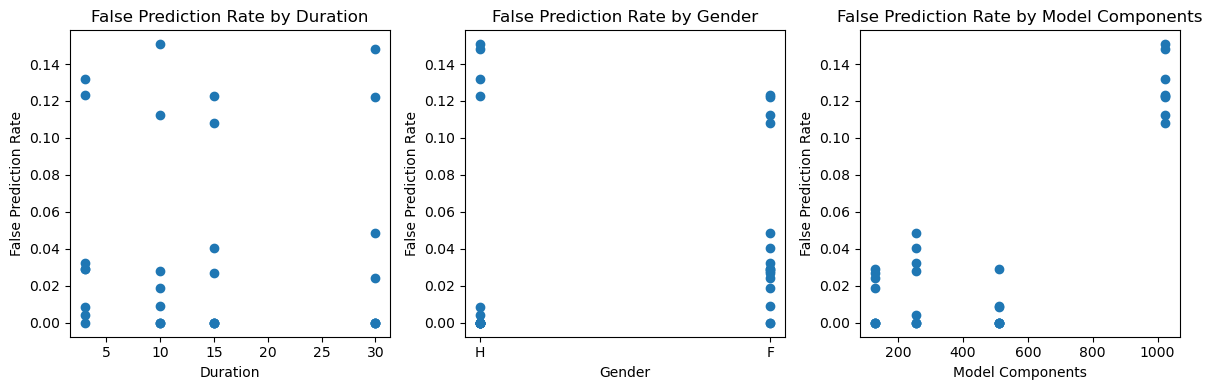

In [71]:
# Extract duration, gender, and model components from keys
durations = []
genders = []
model_components = []
rates = []

for key, rate in false_prediction_rate.items():
    parts = key.split('_')
    duration = int(parts[3])
    gender = parts[4]
    model_component = int(parts[5])
    
    durations.append(duration)
    genders.append(gender)
    model_components.append(model_component)
    rates.append(rate)

# Plot the rates
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot for duration
axs[0].scatter(durations, rates)
axs[0].set_title("False Prediction Rate by Duration")
axs[0].set_xlabel("Duration")
axs[0].set_ylabel("False Prediction Rate")

# Plot for gender
axs[1].scatter(genders, rates)
axs[1].set_title("False Prediction Rate by Gender")
axs[1].set_xlabel("Gender")
axs[1].set_ylabel("False Prediction Rate")

# Plot for model components
axs[2].scatter(model_components, rates)
axs[2].set_title("False Prediction Rate by Model Components")
axs[2].set_xlabel("Model Components")
axs[2].set_ylabel("False Prediction Rate")

plt.tight_layout()
plt.show()

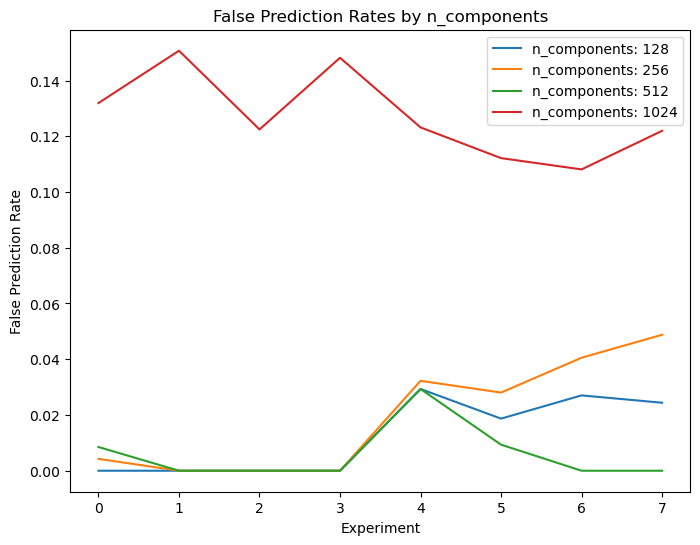

In [72]:
from collections import defaultdict

# Create a defaultdict to store the false prediction rates
grouped_rates = defaultdict(list)

# Accumulate the rates for each n_components group
for key, rate in false_prediction_rate.items():
    parts = key.split('_')
    n = int(parts[5])
    grouped_rates[n].append(rate)

# Extract n_components and rates
n_components = list(grouped_rates.keys())
rates = [grouped_rates[n] for n in n_components]

# Plot the curve
plt.figure(figsize=(8, 6))
for n, rate in zip(n_components, rates):
    plt.plot(rate, label=f'n_components: {n}')
plt.title("False Prediction Rates by n_components")
plt.xlabel("Experiment")
plt.ylabel("False Prediction Rate")
plt.legend()
plt.show()


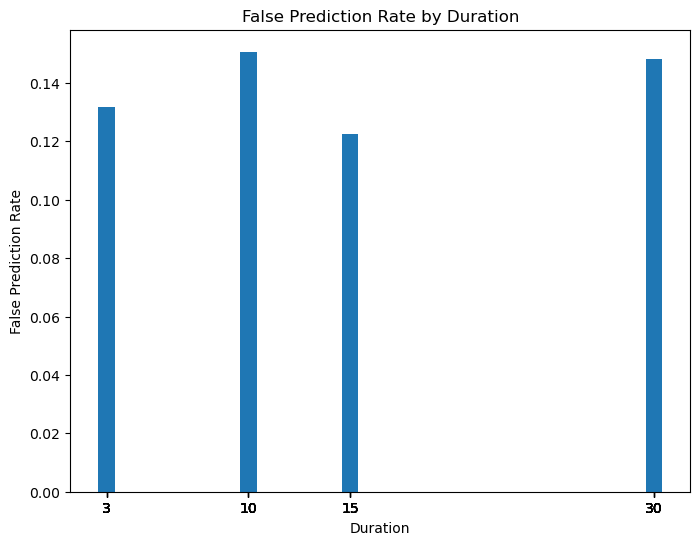

In [73]:
# Extract durations and rates
durations = []
rates = []

for key, rate in false_prediction_rate.items():
    parts = key.split('_')
    duration = int(parts[3])
    durations.append(duration)
    rates.append(rate)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(durations, rates)
plt.title("False Prediction Rate by Duration")
plt.xlabel("Duration")
plt.ylabel("False Prediction Rate")
plt.xticks(durations)
plt.show()


In [74]:
false_prediction_rate

{'false_prediction_rate_3_H_128': 0.0,
 'false_prediction_rate_10_H_128': 0.0,
 'false_prediction_rate_15_H_128': 0.0,
 'false_prediction_rate_30_H_128': 0.0,
 'false_prediction_rate_3_H_256': 0.00425531914893617,
 'false_prediction_rate_10_H_256': 0.0,
 'false_prediction_rate_15_H_256': 0.0,
 'false_prediction_rate_30_H_256': 0.0,
 'false_prediction_rate_3_H_512': 0.00851063829787234,
 'false_prediction_rate_10_H_512': 0.0,
 'false_prediction_rate_15_H_512': 0.0,
 'false_prediction_rate_30_H_512': 0.0,
 'false_prediction_rate_3_H_1024': 0.13191489361702127,
 'false_prediction_rate_10_H_1024': 0.1506849315068493,
 'false_prediction_rate_15_H_1024': 0.12244897959183673,
 'false_prediction_rate_30_H_1024': 0.14814814814814814,
 'false_prediction_rate_3_F_128': 0.02932551319648094,
 'false_prediction_rate_10_F_128': 0.018691588785046728,
 'false_prediction_rate_15_F_128': 0.02702702702702703,
 'false_prediction_rate_30_F_128': 0.024390243902439025,
 'false_prediction_rate_3_F_256': 0.0322

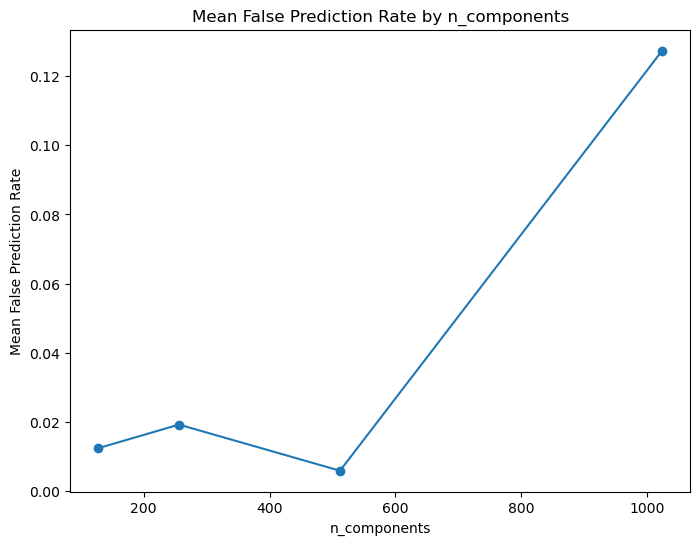

In [75]:
# Calculate mean rates
mean_rates = []
n_components = [128, 256, 512, 1024]

for n in n_components:
    rates = []
    for key, rate in false_prediction_rate.items():
        parts = key.split('_')
        if int(parts[5]) == n:
            rates.append(rate)
    mean_rate = sum(rates) / len(rates)
    mean_rates.append(mean_rate)

# Plot the mean rates
plt.figure(figsize=(8, 6))
plt.plot(n_components, mean_rates, marker='o', linestyle='-')
plt.title("Mean False Prediction Rate by n_components")
plt.xlabel("n_components")
plt.ylabel("Mean False Prediction Rate")
plt.show()
